# IRIS FLOWER CLASSIFICATION-TASK1
NAME : P.VISHNU VARDHAN 
BATCH NAME : AUGUST PHASE-2 (OIBSIP)

In [36]:
import numpy as npx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [37]:
data = pd.read_csv('Iris.csv')

In [38]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [41]:
data.drop('Id',axis=1, inplace=True)

<Figure size 1000x500 with 0 Axes>

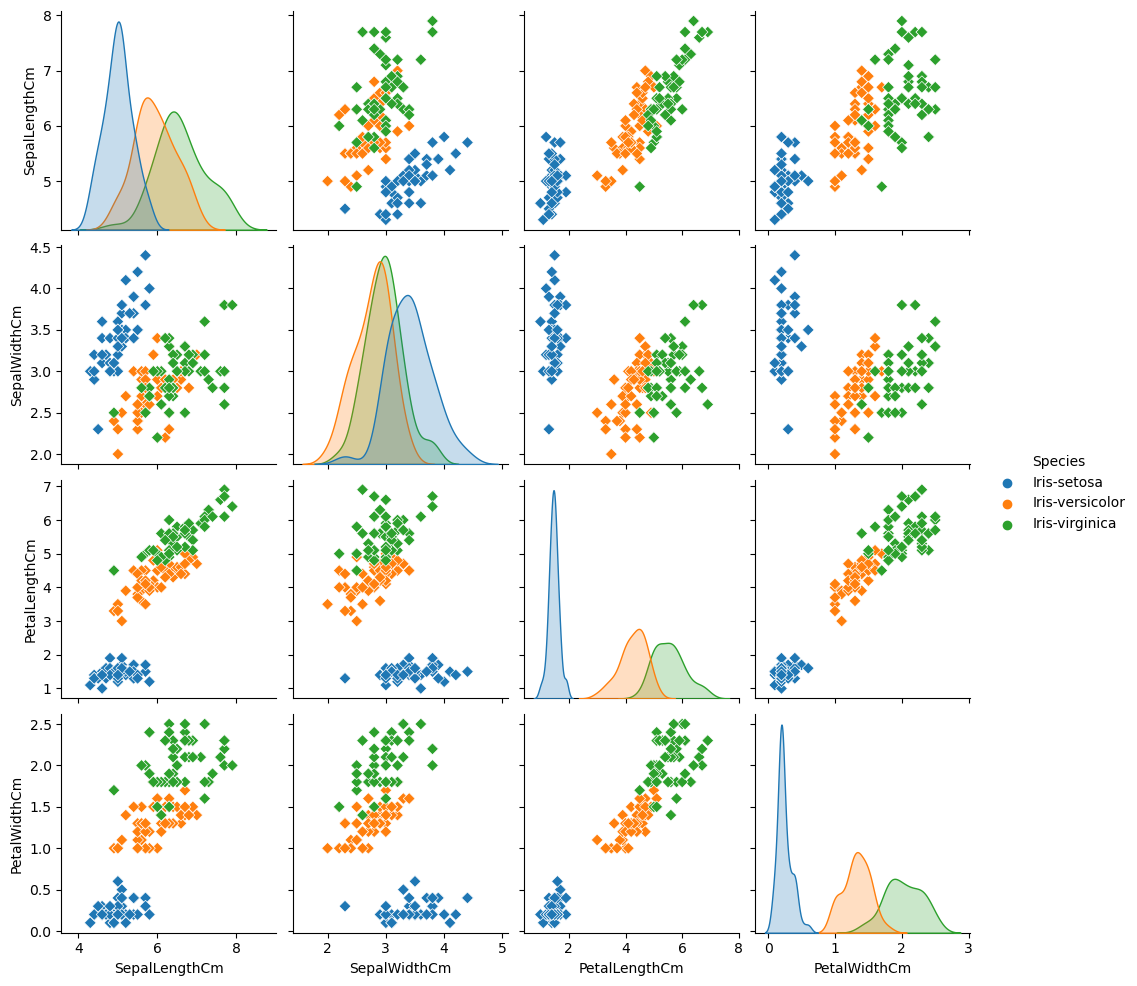

In [42]:
plt.figure(figsize=(10,5))
sn.pairplot(data, hue='Species',markers='D')
plt.show()

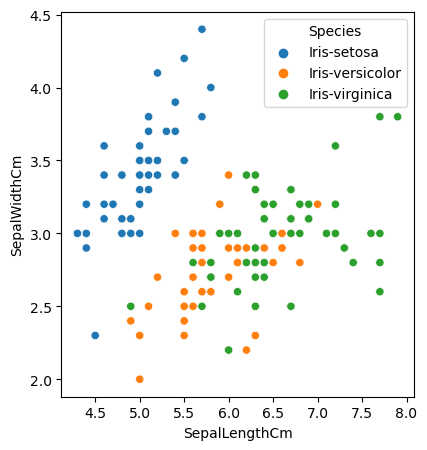

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sn.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data,hue='Species')
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['EncodedSpecies'] = le.fit_transform(data['Species'])
data.drop('Species',axis=1,inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,EncodedSpecies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
x = data.iloc[:,0:4]
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: EncodedSpecies, Length: 150, dtype: int32

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [47]:
y_pred_decoded = le.inverse_transform(y_pred)
y_pred_df = pd.DataFrame({'Predicted_Letter': y_pred_decoded})

print('Predicted DataFrame')
print(y_pred_df)

Predicted DataFrame
   Predicted_Letter
0   Iris-versicolor
1       Iris-setosa
2    Iris-virginica
3   Iris-versicolor
4   Iris-versicolor
5       Iris-setosa
6   Iris-versicolor
7    Iris-virginica
8   Iris-versicolor
9   Iris-versicolor
10   Iris-virginica
11      Iris-setosa
12      Iris-setosa
13      Iris-setosa
14      Iris-setosa
15  Iris-versicolor
16   Iris-virginica
17  Iris-versicolor
18  Iris-versicolor
19   Iris-virginica
20      Iris-setosa
21   Iris-virginica
22      Iris-setosa
23   Iris-virginica
24   Iris-virginica
25   Iris-virginica
26   Iris-virginica
27   Iris-virginica
28      Iris-setosa
29      Iris-setosa


In [48]:
modelscore = model.score(x_test,y_test)
print("Accuracy:", modelscore*100)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

print(classification_report(y_test, y_pred))

Accuracy: 100.0
Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

